# Descriptive Stats

## Loading the data

In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [50]:
file_path = r'/Users/jeevankumarbanoth/Downloads/Heart.csv'
heart_data = pd.read_csv(file_path)

print("First few rows of the DataFrame:")
heart_data.head()

First few rows of the DataFrame:


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [51]:
print("\nBasic statistical analysis for numerical columns:")
heart_data.describe()


Basic statistical analysis for numerical columns:


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [52]:
heart_data.shape

(303, 15)

## Cleaning the data

In [53]:
print("\nCounts of unique values in categorical columns:")
for column in heart_data.select_dtypes(include=['object']).columns:
    print(f"{column}:")
    print(heart_data[column].value_counts())
    print()

print("\nMissing values:")
print(heart_data.isnull().sum())


Counts of unique values in categorical columns:
ChestPain:
ChestPain
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: count, dtype: int64

Thal:
Thal
normal        166
reversable    117
fixed          18
Name: count, dtype: int64

AHD:
AHD
No     164
Yes    139
Name: count, dtype: int64


Missing values:
Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


In [24]:
cleaned_heart_data = heart_data.dropna()

print("\nShape of cleaned DataFrame after removing missing values:")
print(cleaned_heart_data.shape)


Shape of cleaned DataFrame after removing missing values:
(297, 15)


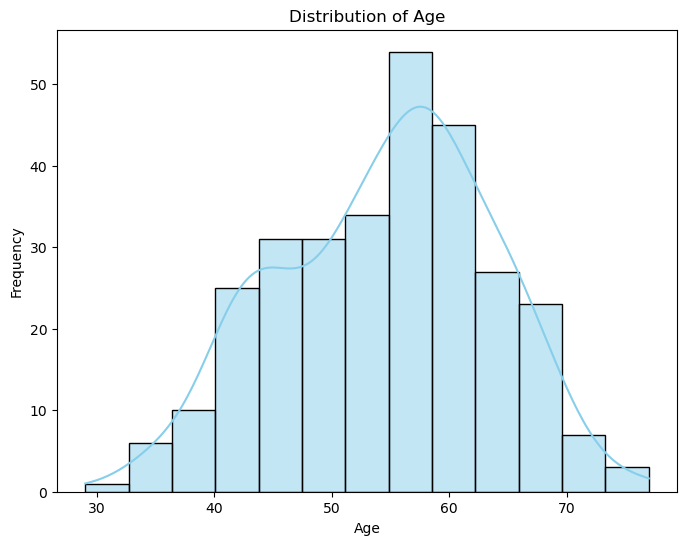

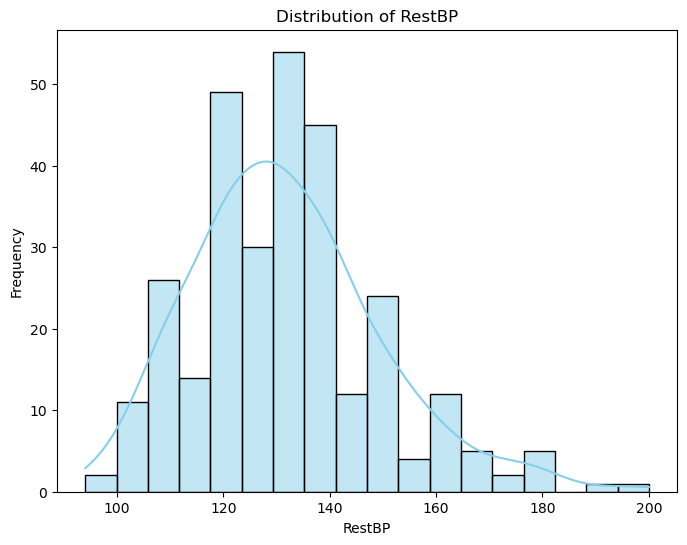

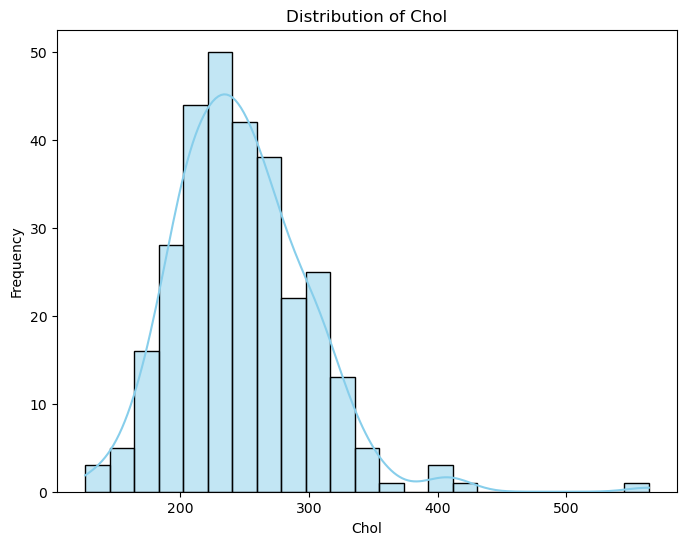

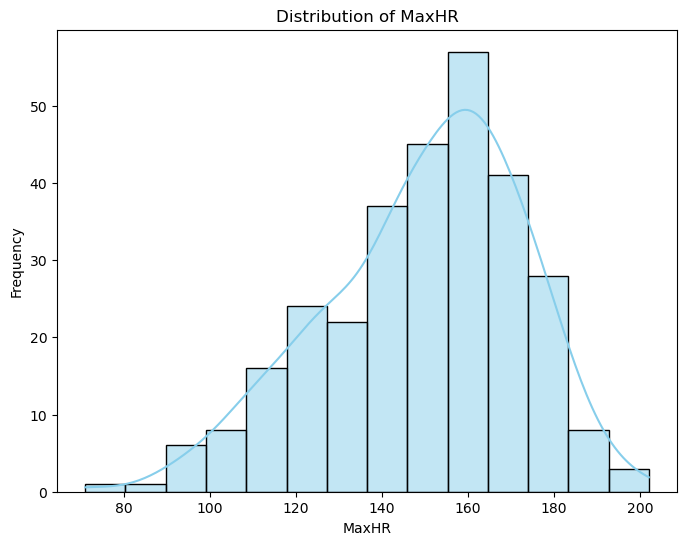

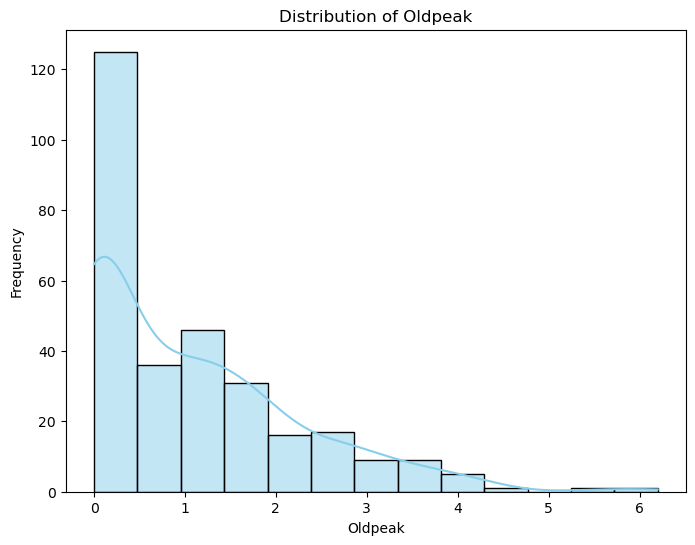

In [44]:
# Plot histograms for numerical variables
numerical_vars = ["Age", "RestBP", "Chol", "MaxHR", "Oldpeak"]
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(cleaned_heart_data[var], kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

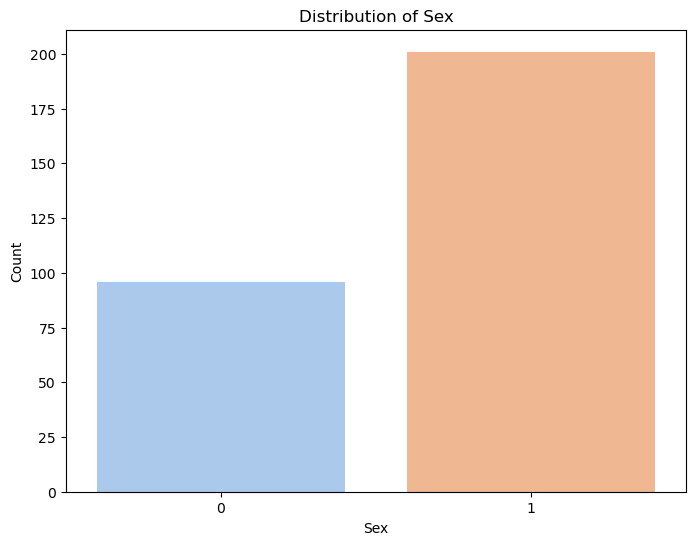

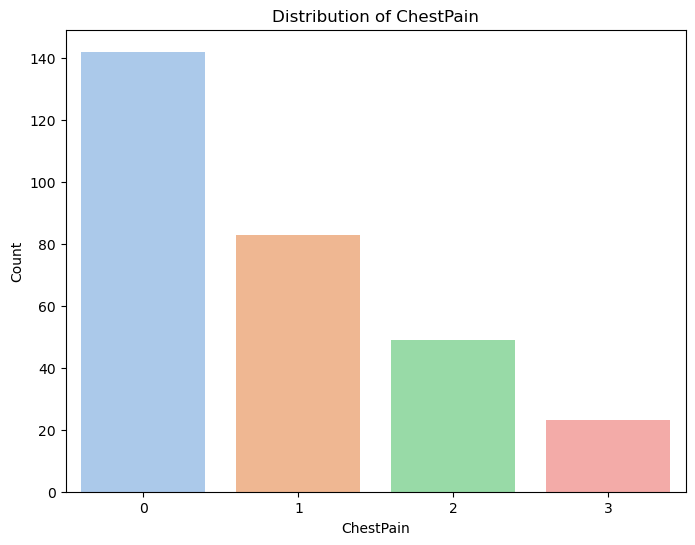

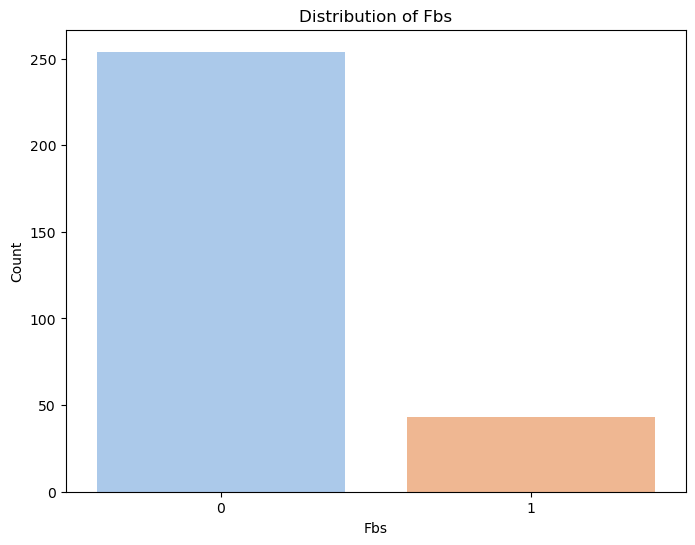

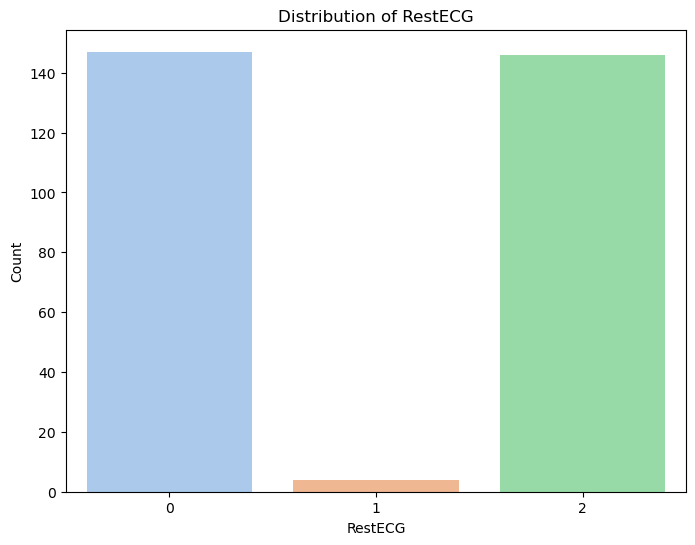

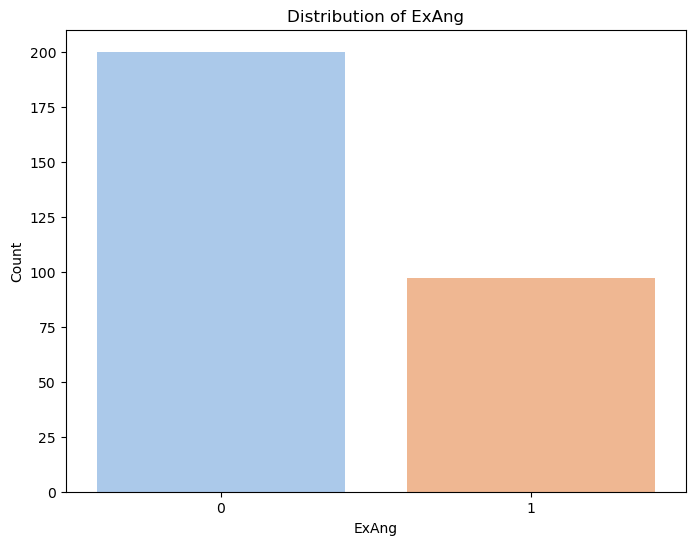

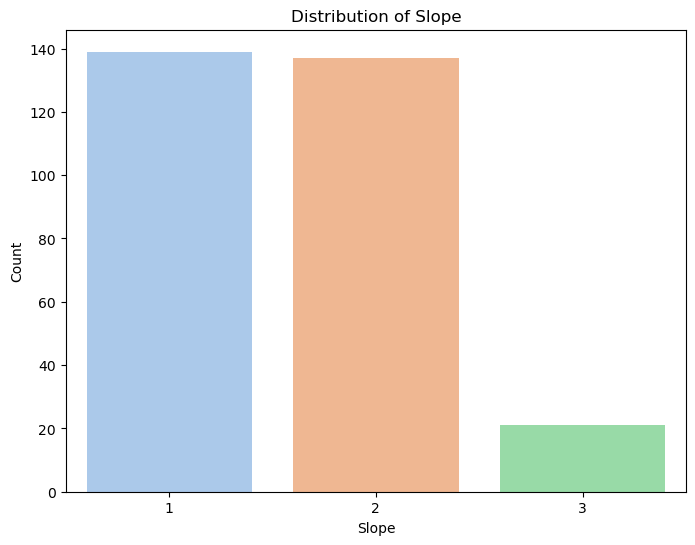

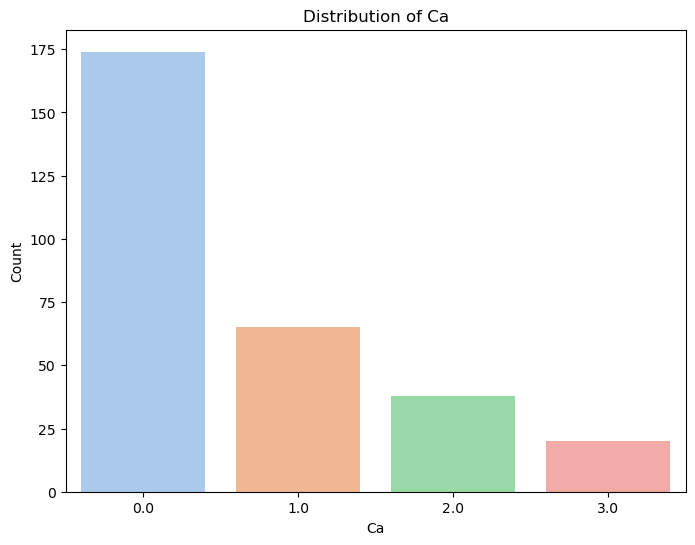

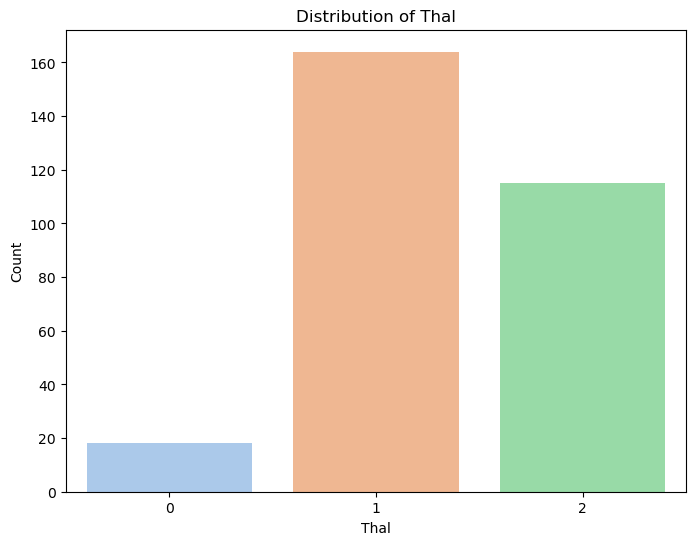

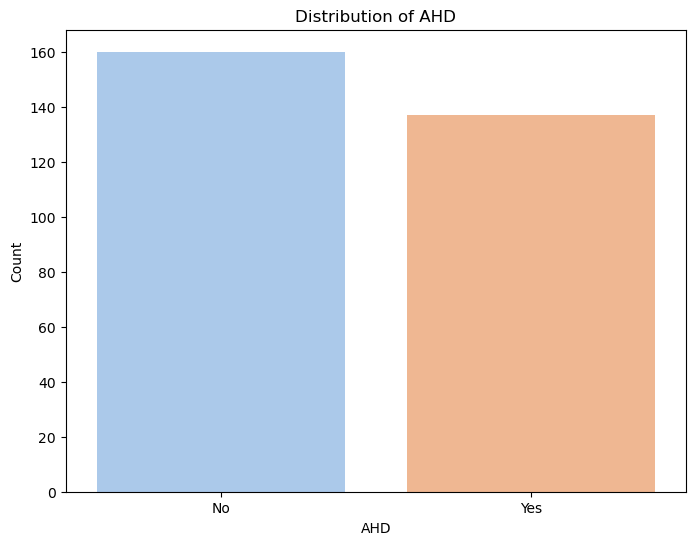

In [45]:
# Plot bar plots for categorical variables
categorical_vars = ["Sex", "ChestPain", "Fbs", "RestECG", "ExAng", "Slope", "Ca", "Thal", "AHD"]
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=cleaned_heart_data, x=var, palette='pastel')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

Intercept: -0.13187790366514018
Coefficients: [3.02159402e-03 1.32995909e-04 2.39869911e-01]


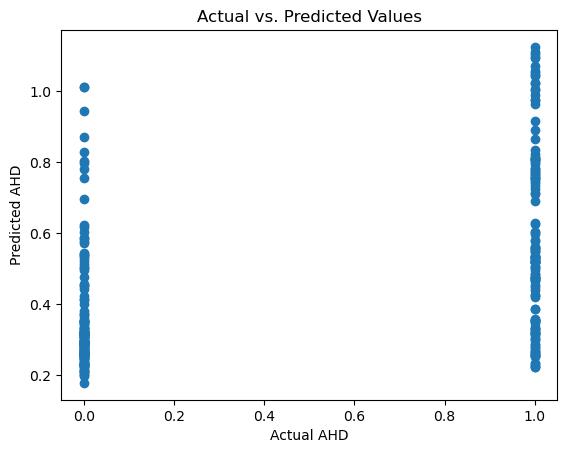

Mean Squared Error: 0.19220708504625228
R-squared: 0.2265330855453983


In [25]:
encoded_heart_data = cleaned_heart_data.copy()
label_encoder = LabelEncoder()
encoded_heart_data['AHD'] = label_encoder.fit_transform(encoded_heart_data['AHD'])
X = encoded_heart_data[['RestBP', 'Chol', 'Ca']]
y = encoded_heart_data['AHD']
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
y_pred = model.predict(X)


plt.scatter(y, y_pred)
plt.xlabel('Actual AHD')
plt.ylabel('Predicted AHD')
plt.title('Actual vs. Predicted Values')
plt.show()

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [26]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores)

mean_cv_score = cv_scores.mean()
print("Mean Cross-validation Score:", mean_cv_score)

Cross-validation Scores: [0.1274086  0.24966103 0.08923102 0.23856727 0.22876601]
Mean Cross-validation Score: 0.18672678602419854


# DECISION TREES MODEL

In [27]:
heart_data = pd.read_csv(file_path)
cleaned_heart_data = heart_data.dropna()


X = cleaned_heart_data.drop('AHD', axis=1)  # Features
y = cleaned_heart_data['AHD']  # Target variable

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)

Accuracy: 0.8166666666666667


In [28]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
precision_dt = precision_score(y_test, y_pred, pos_label='Yes')
recall_dt = recall_score(y_test, y_pred, pos_label='Yes')
f1_dt = f1_score(y_test, y_pred, pos_label='Yes')

print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)

Confusion Matrix:
[[28  8]
 [ 3 21]]
Precision: 0.7241379310344828
Recall: 0.875
F1-Score: 0.7924528301886793


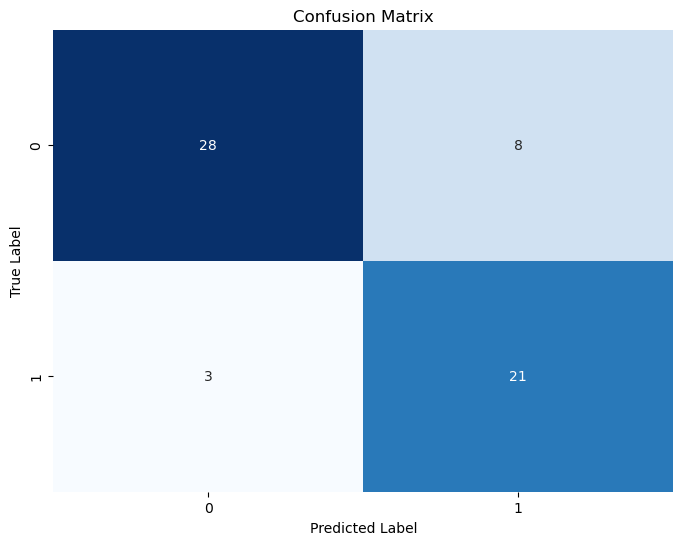

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

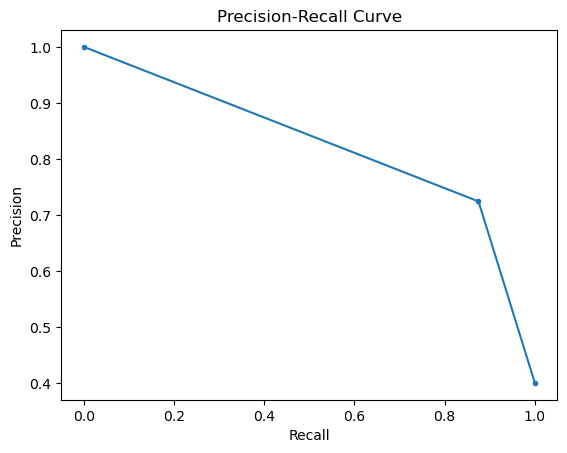

In [30]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import LabelEncoder

# Encode labels as integers (1 for 'Yes', 0 for 'No')
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_encoded, y_pred_encoded)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

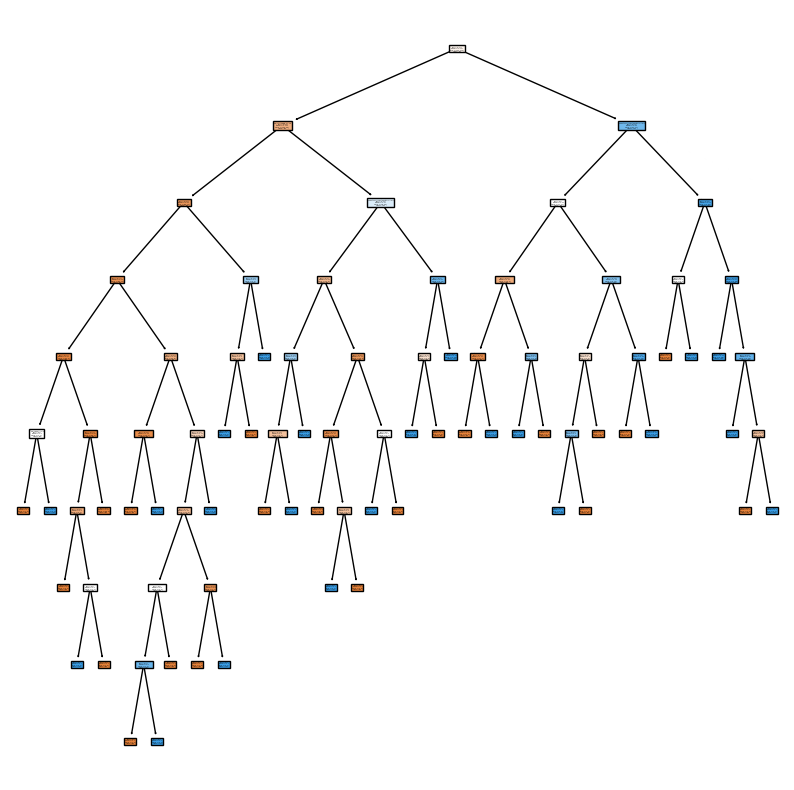

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
# Convert feature_names and class_names to list
plot_tree(model, feature_names=list(X.columns), class_names=list(label_encoder.classes_), filled=True)
plt.savefig('decision_tree.png', dpi=300)  # Save the plot as an image file
plt.show()


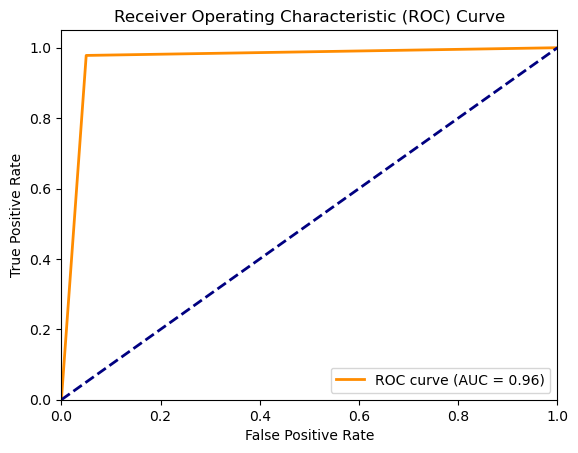

In [36]:
y_binary = y.map({'No': 0, 'Yes': 1})
y_pred_proba = model.predict_proba(X)[:, 1]

fpr_dt, tpr_dt, thresholds = roc_curve(y_binary, y_pred_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# XGBoost MODEL

In [37]:
heart_data = pd.read_csv(file_path)

cleaned_heart_data = heart_data.dropna()
label_encoder = LabelEncoder()
cleaned_heart_data['AHD'] = label_encoder.fit_transform(cleaned_heart_data['AHD'])
cleaned_heart_data = pd.get_dummies(cleaned_heart_data, columns=['ChestPain', 'Thal'])

X = cleaned_heart_data.drop('AHD', axis=1)
y = cleaned_heart_data['AHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[31  5]
 [ 5 19]]
Precision: 0.7916666666666666
Recall: 0.7916666666666666
F1 Score: 0.7916666666666666


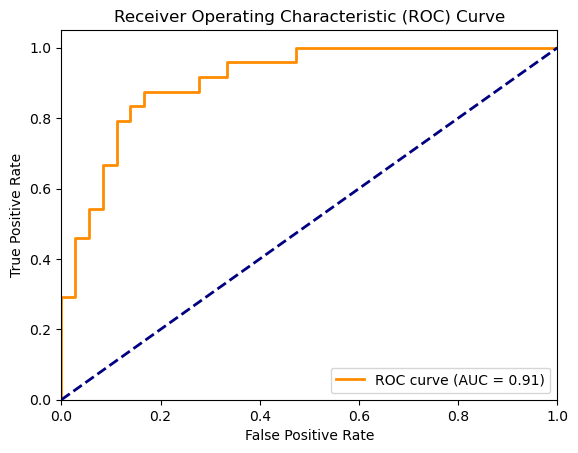

In [38]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machines (SVM) MODEL

In [39]:
heart_data = pd.read_csv(file_path)
cleaned_heart_data = heart_data.dropna()

label_encoder = LabelEncoder()
cleaned_heart_data['ChestPain'] = label_encoder.fit_transform(cleaned_heart_data['ChestPain'])
cleaned_heart_data['Thal'] = label_encoder.fit_transform(cleaned_heart_data['Thal'])

X = cleaned_heart_data.drop('AHD', axis=1)
y = cleaned_heart_data['AHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred)
conf_matrix_svm = confusion_matrix(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, pos_label='Yes')
recall_svm = recall_score(y_test, y_pred, pos_label='Yes')
f1_svm = f1_score(y_test, y_pred, pos_label='Yes')

print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Accuracy: 0.85
Confusion Matrix:
 [[32  4]
 [ 5 19]]
Precision: 0.8260869565217391
Recall: 0.7916666666666666
F1 Score: 0.8085106382978724


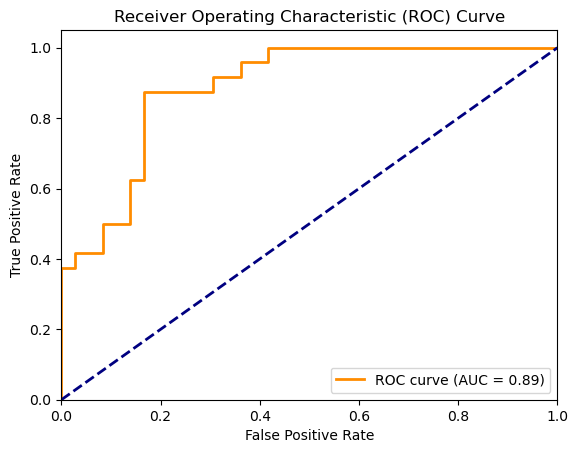

In [40]:
one_hot_encoder = OneHotEncoder()
X_encoded = one_hot_encoder.fit_transform(X)

X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear', C=1.0)
model.fit(X_train_encoded, y_train)

y_pred_proba = model.decision_function(X_test_encoded)
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Yes')
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# COMPARISON OF MODELS

In [41]:
model_names = ['Decision Tree', 'XGBoost', 'SVM']
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

decision_tree_results = [precision_dt, recall_dt, f1_dt, accuracy_dt]
xgboost_results = [precision_xgb, recall_xgb, f1_xgb, accuracy_xgb]
svm_results = [precision_svm, recall_svm, f1_svm, accuracy_svm]

comparison_table = pd.DataFrame({
    'Model': model_names,
    'Precision': [precision_dt, precision_xgb, precision_svm],
    'Recall': [recall_dt, recall_xgb, recall_svm],
    'F1 Score': [f1_dt, f1_xgb, f1_svm],
    'Accuracy': [accuracy_dt, accuracy_xgb, accuracy_svm]
})

comparison_table

,Model,Precision,Recall,F1 Score,Accuracy
0,Decision Tree,0.724138,0.875000,0.792453,0.816667
1,XGBoost,0.791667,0.791667,0.791667,0.833333
2,SVM,0.826087,0.791667,0.808511,0.850000


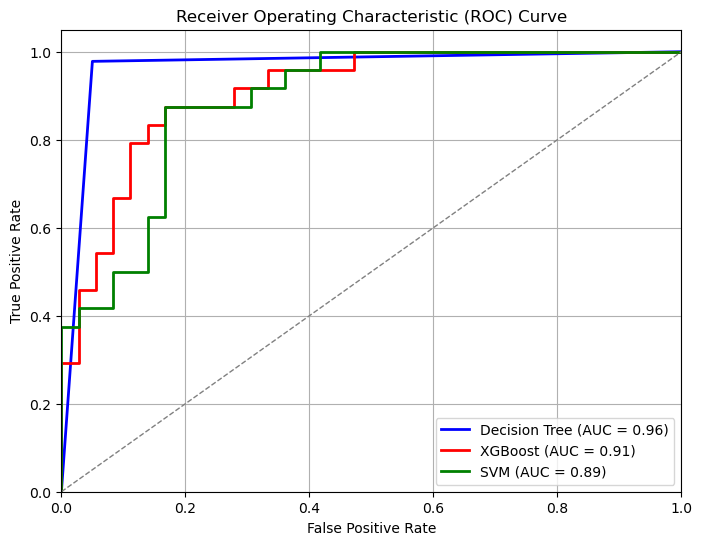

Decision Tree AUC: 0.9640510948905109
XGBoost AUC: 0.9085648148148148
SVM AUC: 0.8877314814814814


In [42]:
# Plotting ROC curves for Decision Tree, XGBoost, and SVM models
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC values
print("Decision Tree AUC:", roc_auc_dt)
print("XGBoost AUC:", roc_auc_xgb)
print("SVM AUC:", roc_auc_svm)

In [43]:
comparison_table

,Model,Precision,Recall,F1 Score,Accuracy
0,Decision Tree,0.724138,0.875000,0.792453,0.816667
1,XGBoost,0.791667,0.791667,0.791667,0.833333
2,SVM,0.826087,0.791667,0.808511,0.850000
